### Compare cortical thickness measures across datasets
- NIMHANS
- QPN
- PPMI

In [5]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nibabel as nib
from nilearn import datasets, surface, plotting


In [12]:
projects_dir = f"/home/nikhil/projects/neuroinformatics_tools/" 

nimhans_agg_data_dir = f"{projects_dir}/mr_proc-nimhans_serb/analysis/CT/agg_dfs/"
qpn_agg_data_dir = f"{projects_dir}/mr_proc-qpn/analysis/CT/agg_dfs/"

CT_DKT_csv = "CT_DKT_df.csv"
bilateral_vol_csv = "bilateral_vol_ASEG_df.csv"
global_vol_csv = "global_vol_ASEG_df.csv"

# save dirs
figs_dir = "../figs/population_comparisons"

demo_cols = ["participant_id","age","sex","group","hemi","dataset"]

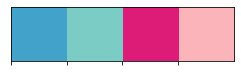

In [20]:
from enum import Enum
class my_colors(Enum):
    QPN_CONTROL = "#7bccc4"
    QPN_PD = "#43a2ca"
    NIM_CONTROL = "#fbb4b9"
    NIM_PD = "#dd1c77"
    
color_list = [my_colors.QPN_PD.value, my_colors.QPN_CONTROL.value,my_colors.NIM_PD.value, my_colors.NIM_CONTROL.value,]
palette = sns.color_palette(palette=color_list) #sns.husl_palette()

sns.palplot(palette)

### Read data

In [22]:
nimhans_CT_DKT_df = pd.read_csv(f"{nimhans_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
nimhans_CT_DKT_df["dataset"] = "NIMHANS"
n_nimhans_participants = len(nimhans_CT_DKT_df["participant_id"].unique())

qpn_CT_DKT_df = pd.read_csv(f"{qpn_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
qpn_CT_DKT_df["dataset"] = "QPN"
n_qpn_participants = len(qpn_CT_DKT_df["participant_id"].unique())

print(f"n_nimhans_participants: {n_nimhans_participants}, n_qpn_participants:{n_qpn_participants}")

# Concat
CT_DKT_df = pd.concat([nimhans_CT_DKT_df, qpn_CT_DKT_df], axis=0)
CT_DKT_df["ds_group"] = CT_DKT_df["dataset"] + "-" + CT_DKT_df["group"]
print(f"CT_DKT_df shape: {CT_DKT_df.shape}")
CT_DKT_df.head()

n_nimhans_participants: 86, n_qpn_participants:201
CT_DKT_df shape: (574, 38)


,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,insula,isthmuscingulate,lateraloccipital,...,superiortemporal,supramarginal,transversetemporal,participant_id,age,sex,group,hemi,dataset,ds_group
0,2.643,2.648,1.866,3.932,3.098,2.638,2.969,3.294,2.312,2.189,...,3.044,2.717,2.386,SERB088,54.0,M,PD,lh,NIMHANS,NIMHANS-PD
1,3.230,2.844,1.941,3.825,2.900,2.479,3.003,3.427,2.308,2.365,...,2.998,2.589,1.971,SERB058,64.0,M,PD,lh,NIMHANS,NIMHANS-PD
2,2.756,2.717,1.997,3.036,2.709,2.457,2.875,3.183,2.388,2.123,...,2.912,2.526,1.875,SERB049,62.0,M,PD,lh,NIMHANS,NIMHANS-PD
3,2.974,2.603,1.819,3.802,2.701,2.399,2.947,3.205,2.468,2.364,...,2.928,2.532,2.250,SERB084,NaN,NaN,PD,lh,NIMHANS,NIMHANS-PD
4,3.015,2.939,1.998,4.177,3.054,2.831,3.403,3.701,2.462,2.382,...,3.118,2.933,2.776,SERB063,56.0,M,PD,lh,NIMHANS,NIMHANS-PD


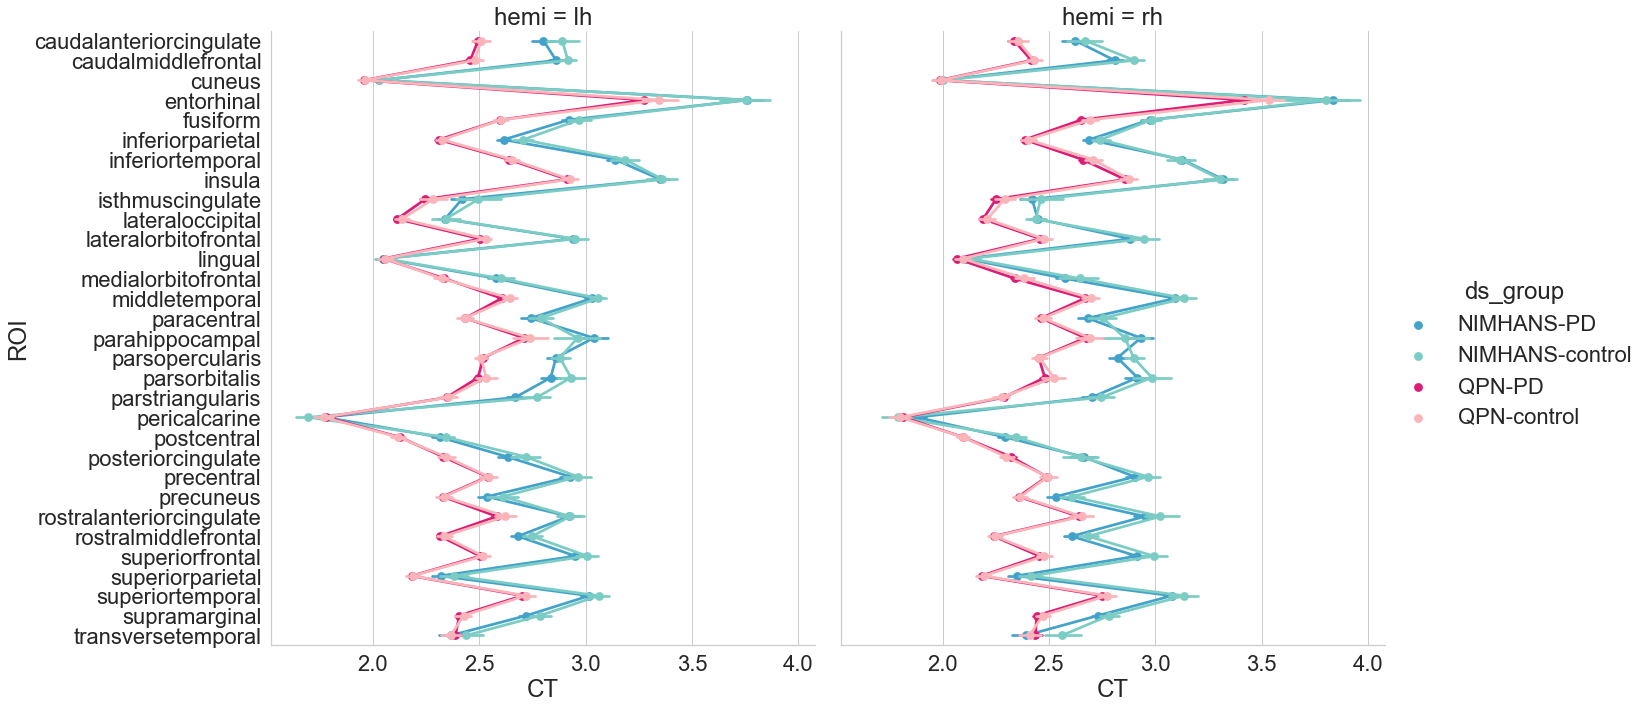

In [28]:
save_fig = False

CT_DKT_df_melt = CT_DKT_df.melt(
    id_vars=demo_cols + ["ds_group"],
    var_name="ROI", 
    value_name="CT")

plot_df = CT_DKT_df_melt.copy()
plot_df["ROI"] = plot_df["ROI"].astype(str)

sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="ROI",x="CT", hue="ds_group", col="hemi",kind="point",palette=palette, data=plot_df, aspect=1, height=10)
    # g.tick_params(axis='x', rotation=90, labelsize=14)

if save_fig:
    g.savefig(f"{figs_dir}/DKT.png")

### Aseg bilateral volume

In [30]:
nimhans_hemi_ASEG_df = pd.read_csv(f"{nimhans_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_hemi_ASEG_df["dataset"] = "NIMHANS"
n_nimhans_participants = len(nimhans_hemi_ASEG_df["participant_id"].unique())

qpn_hemi_ASEG_df = pd.read_csv(f"{qpn_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
qpn_hemi_ASEG_df["dataset"] = "QPN"
n_qpn_participants = len(qpn_hemi_ASEG_df["participant_id"].unique())

print(f"n_nimhans_participants: {n_nimhans_participants}, n_qpn_participants:{n_qpn_participants}")

# Concat
hemi_ASEG_df = pd.concat([nimhans_hemi_ASEG_df, qpn_hemi_ASEG_df], axis=0)
hemi_ASEG_df["ds_group"] = hemi_ASEG_df["dataset"] + "-" + hemi_ASEG_df["group"]
print(f"hemi_ASEG_df shape: {hemi_ASEG_df.shape}")
hemi_ASEG_df.head()

n_nimhans_participants: 86, n_qpn_participants:201
CT_DKT_df shape: (574, 21)


,Lateral-Ventricle,Accumbens-area,Cerebellum-Cortex,vessel,VentralDC,Cerebellum-White-Matter,Amygdala,Caudate,Thalamus-Proper,Inf-Lat-Vent,...,choroid-plexus,Putamen,Hippocampus,participant_id,age,sex,group,hemi,dataset,ds_group
0,9170.500000,394.600006,49608.800781,125.800003,3958.899902,14102.900391,1659.300049,3355.899902,6357.399902,305.000000,...,684.400024,4586.500000,3580.399902,SERB088,54.0,M,PD,lh,NIMHANS,NIMHANS-PD
1,7667.399902,177.800003,42569.199219,24.000000,3381.600098,12641.299805,1223.000000,2633.600098,5716.799805,499.500000,...,623.900024,3512.899902,3400.500000,SERB058,64.0,M,PD,lh,NIMHANS,NIMHANS-PD
2,16945.599609,431.500000,50561.199219,29.299999,3974.399902,20009.800781,1357.099976,3021.699951,6195.899902,773.900024,...,1066.400024,4779.700195,3541.500000,SERB049,62.0,M,PD,lh,NIMHANS,NIMHANS-PD
3,10064.700195,349.500000,41859.898438,13.900000,3525.199951,10348.900391,1344.599976,1672.599976,5412.100098,195.899994,...,818.299988,2910.699951,3827.000000,SERB084,NaN,NaN,PD,lh,NIMHANS,NIMHANS-PD
4,8531.599609,403.799988,46157.500000,40.000000,3328.600098,11251.599609,1442.900024,2352.199951,5824.899902,580.599976,...,592.799988,3410.100098,3377.800049,SERB063,56.0,M,PD,lh,NIMHANS,NIMHANS-PD


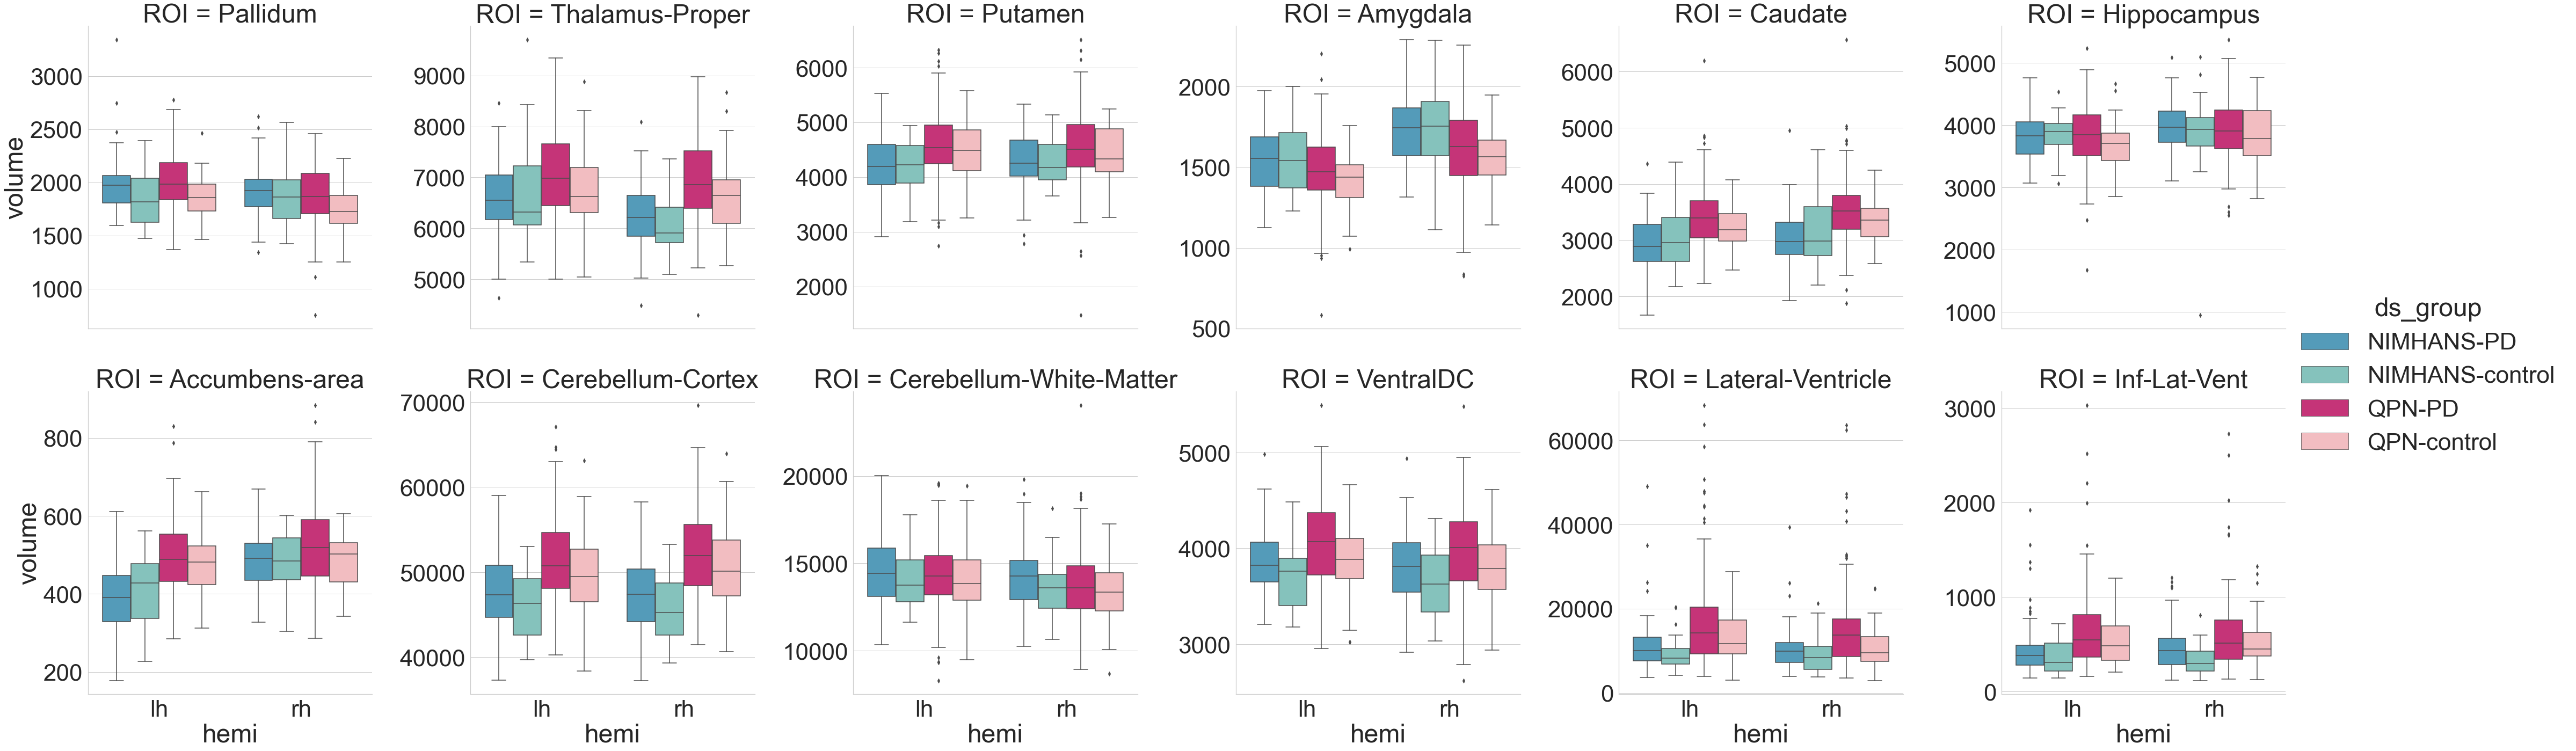

In [34]:
save_fig = False

vol_ASEG_df_melt = hemi_ASEG_df.melt(
    id_vars=demo_cols + ["ds_group"],
    var_name="ROI", 
    value_name="volume",
)

plot_df = vol_ASEG_df_melt.copy()
plot_df["ROI"] = plot_df["ROI"].astype(str)
hemi_roi_list = ['Pallidum', 'Thalamus-Proper', 'Putamen',  'Amygdala', 'Caudate', 'Hippocampus', 'Accumbens-area', 
                'Cerebellum-Cortex','Cerebellum-White-Matter','VentralDC', 'Lateral-Ventricle','Inf-Lat-Vent']

sns.set(font_scale=4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="volume",x="hemi", hue="ds_group", col="ROI",kind="box", col_wrap=6, col_order=hemi_roi_list,
    palette=palette, data=plot_df, aspect=1, height=10, sharey=False)
    # g.tick_params(axis='x', rotation=90, labelsize=14)

if save_fig:
    g.savefig(f"{figs_dir}/ASEG_hemi.png")

### Global volumes

In [ ]:
nimhans_global_ASEG_df = pd.read_csv(f"{nimhans_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_global_ASEG_df["dataset"] = "NIMHANS"
n_nimhans_participants = len(nimhans_global_ASEG_df["participant_id"].unique())

qpn_global_ASEG_df = pd.read_csv(f"{qpn_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
qpn_global_ASEG_df["dataset"] = "QPN"
n_qpn_participants = len(qpn_global_ASEG_df["participant_id"].unique())

print(f"n_nimhans_participants: {n_nimhans_participants}, n_qpn_participants:{n_qpn_participants}")

# Concat
global_vol_ASEG_df = pd.concat([nimhans_global_ASEG_df, qpn_global_ASEG_df], axis=0)
global_vol_ASEG_df["ds_group"] = global_vol_ASEG_df["dataset"] + "-" + global_vol_ASEG_df["group"]
print(f"global_vol_ASEG_df shape: {global_vol_ASEG_df.shape}")
hemi_ASEG_df.head()

In [ ]:
save_fig = False

global_vol_ASEG_df_melt = global_vol_ASEG_df.melt(
    id_vars=demo_cols + ["hemi"],
    var_name="ROI", 
    value_name="volume",
)

plot_df = global_vol_ASEG_df_melt.copy()

global_roi_list = ["EstimatedTotalIntraCranial", "SupraTentorial", "TotalGray", "SubCortGray", 
                    "CSF","Brain-Stem","3rd-Ventricle","4th-Ventricle"]
plot_df = plot_df[plot_df["ROI"].isin(global_roi_list)]

sns.set(font_scale=4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="volume",x="hemi", hue="group", col="ROI",kind="box", col_wrap=4, col_order=global_roi_list,
    palette=palette, data=plot_df, aspect=1, height=10, sharey=False)

if save_fig:
    g.savefig(f"{figs_dir}/ASEG_global.png")